In [150]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "normal"
plt.rcParams["font.size"] = 25
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['legend.fontsize']: 16
    
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Part I: Data Analysis**

In [151]:
telco = pd.read_csv('Telco_Churn.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [152]:
### Checking if their are no duplicate entries by Customer ID ###no need for cust ID ###
print(len(telco['customerID'].value_counts()))

7043


In [153]:
### Dropping cust ID as there were no duplicates ###
telco = telco.drop('customerID', axis=1)

In [154]:
### Simply capitalizing Gender and Tenure ###
telco.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [155]:
### Changing 'TotalCharges' Data Type ###
for idx, row in telco.iterrows():
    if row['TotalCharges'] == ' ':
        telco.loc[idx, 'TotalCharges'] = '0'
telco['TotalCharges'] = telco.TotalCharges.astype('float64')

In [156]:
### Gender ### 
telco['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

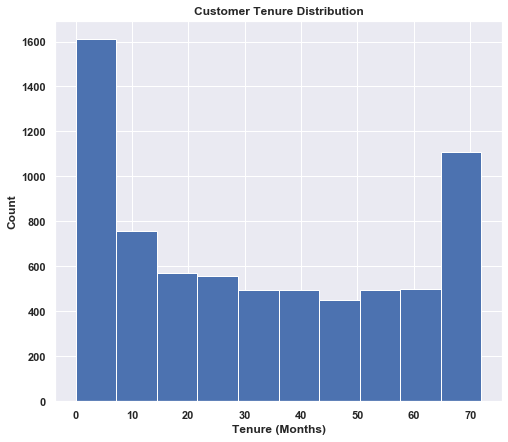

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64


In [157]:
### Tenure ###
plt.hist(telco['Tenure'])
plt.ylabel('Count')
plt.xlabel('Tenure (Months)')
plt.title('Customer Tenure Distribution', fontweight='bold')
plt.show()
print(telco['Tenure'].describe())

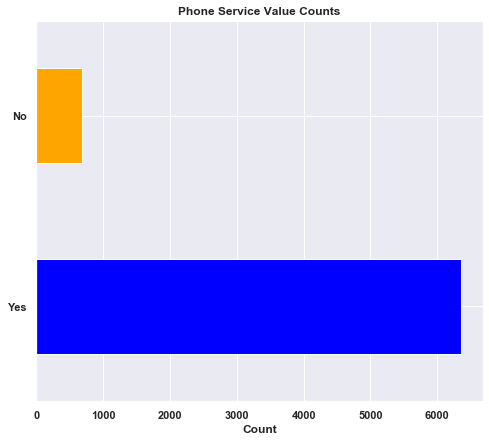

Yes    6361
No      682
Name: PhoneService, dtype: int64


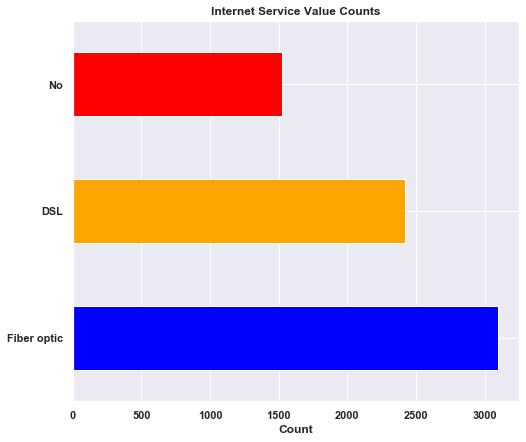

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

***SUMMARY***

Total number of customers:  7043
Number of customers who just have phone service:  1526
Number of customers who just have internet service:  682
Number of customers who have both services:  4835


In [158]:
### Service (Phone and/or Internet) ###
my_colors = ['blue', 'orange', 'red', 'green']

telco['PhoneService'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Phone Service Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['PhoneService'].value_counts())

telco['InternetService'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Internet Service Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['InternetService'].value_counts())

print('\n***SUMMARY***')
print('\nTotal number of customers: ', len(telco))
print('Number of customers who just have phone service: ', len(telco.loc[(telco['PhoneService'] == 'Yes') & (telco['InternetService'] == 'No')]))
print('Number of customers who just have internet service: ', len(telco.loc[(telco['PhoneService'] == 'No') & (telco['InternetService'] != 'No')]))
print('Number of customers who have both services: ', len(telco.loc[(telco['PhoneService'] == 'Yes') & (telco['InternetService'] != 'No')]))

Number of Customers With Phone Service:  6361


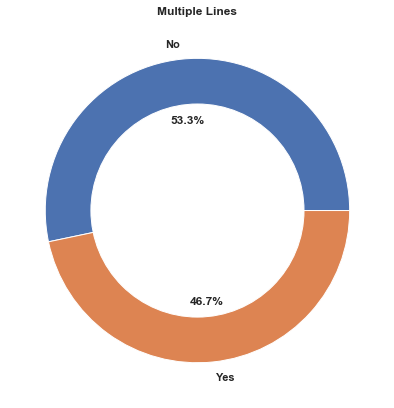

In [159]:
### Those that have Phone Service - Multiple Lines ###
print('\nNumber of Customers With Phone Service: ', len(telco.loc[telco['PhoneService'] == 'Yes']))
size = list(telco.loc[telco['PhoneService'] == 'Yes']['MultipleLines'].value_counts(normalize=True).values * 100)
labels = ['No', 'Yes']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Multiple Lines', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Number of Customers With Internet Service:  5517


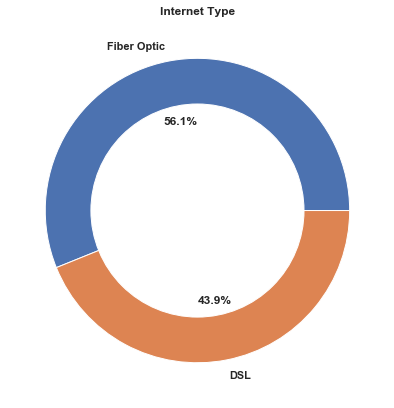


***SUMMARY OF INTERNET OPTIONS/ADD-ONS***

OnlineSecurity (%)
No     0.63404
Yes    0.36596
Name: OnlineSecurity, dtype: float64

OnlineBackup (%)
No     0.559724
Yes    0.440276
Name: OnlineBackup, dtype: float64

DeviceProtection (%)
No     0.560993
Yes    0.439007
Name: DeviceProtection, dtype: float64

TechSupport (%)
No     0.629509
Yes    0.370491
Name: TechSupport, dtype: float64

StreamingTV (%)
No     0.509335
Yes    0.490665
Name: StreamingTV, dtype: float64

StreamingMovies (%)
No     0.504803
Yes    0.495197
Name: StreamingMovies, dtype: float64


In [160]:
### Those that have Internet Service - OnlineSecurity, OnlineBackup, 
# DeviceProtection, TechSupport, StreamingTV, StreamingMovies ###

internet = telco.loc[telco['InternetService'] != 'No']
print('\nNumber of Customers With Internet Service: ', len(internet))
size = list(internet['InternetService'].value_counts(normalize=True).values * 100)
labels = ['Fiber Optic', 'DSL']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Internet Type', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
print('\n***SUMMARY OF INTERNET OPTIONS/ADD-ONS***')
for col in columns:
    print('\n' + col, '(%)')
    print(internet[col].value_counts(normalize=True))

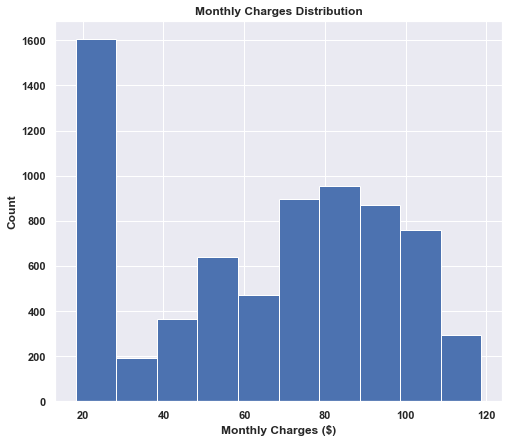

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [161]:
### Monthly Charges ###
plt.hist(telco['MonthlyCharges'])
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.title('Monthly Charges Distribution', fontweight='bold')
plt.show()
print(telco['MonthlyCharges'].describe())

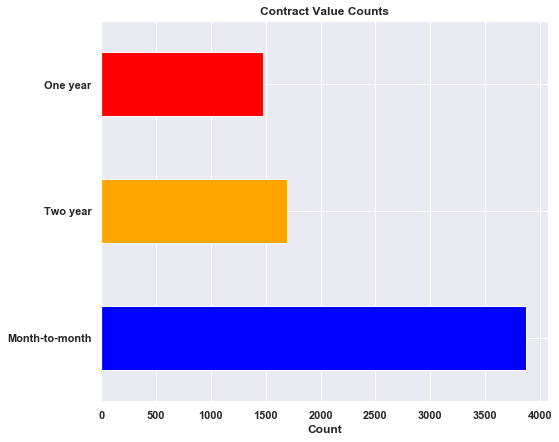

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Avg. Monthly payment by contract type

 Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


In [162]:
### Contract Type ###
telco['Contract'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Contract Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['Contract'].value_counts())

### Average Monthly Payment by Contract Type ###
print('\nAvg. Monthly payment by contract type')
print('\n', telco.groupby('Contract')['MonthlyCharges'].mean())

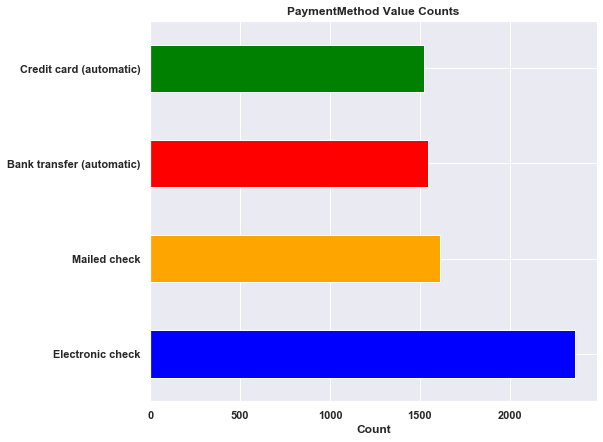

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [163]:
### Payment Methods ###
telco['PaymentMethod'].value_counts().plot(kind='barh', color=my_colors)
plt.title('PaymentMethod Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['PaymentMethod'].value_counts())

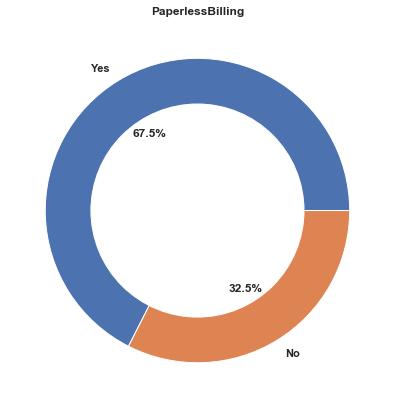

In [164]:
### Paperless Billing ###

size = list(internet['PaperlessBilling'].value_counts(normalize=True).values * 100)
labels = ['Yes', 'No']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('PaperlessBilling', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [165]:
### Assigning numerical values to "yes"/"no" features to later analyze Churn Rates ###
telco.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
key = {'Yes': 1, 'No': 0}
telco['Churn'] = telco['Churn'].map(key)
telco['Partner'] = telco['Partner'].map(key)
telco['Dependents'] = telco['Dependents'].map(key)
telco['PhoneService'] = telco['PhoneService'].map(key)
telco['PaperlessBilling'] = telco['PaperlessBilling'].map(key)